<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Minimization**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

**Function 1** : f(x) = x^3, x E [0,1]

---



In [2]:
def f1(x):
  return x*x*x

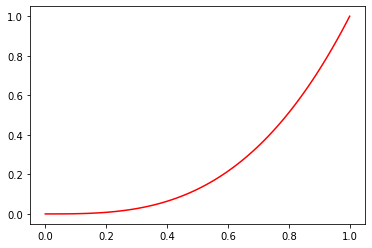

In [3]:
x = np.linspace(0,1,100)
y = f1(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.show()

In [4]:
# Golden Section
result = optimize.minimize_scalar(f1,[0,1], method="golden",tol=0.001) 
result

     fun: -inf
    nfev: 509
     nit: 14
 success: True
       x: -5.647395098620533e+102

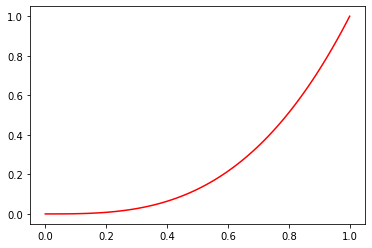

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.plot(result.x, result.fun, 's')
plt.show()

In [6]:
# Nelder-Mead
result = optimize.minimize(f1,x0=0,method="Nelder-Mead", tol=0.001) 
result

 final_simplex: (array([[0.     ],
       [0.00025]]), array([0.0000e+00, 1.5625e-11]))
           fun: 0.0
       message: 'Optimization terminated successfully.'
          nfev: 2
           nit: 1
        status: 0
       success: True
             x: array([0.])

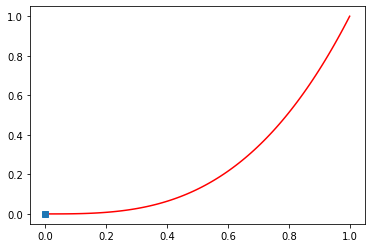

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.plot(result.x, result.fun, 's')
plt.show()

**Function 2**: f(x) = | x - 0.2 |, x E [0, 1]

In [8]:
def f2(x):
  return abs(x-0.2)

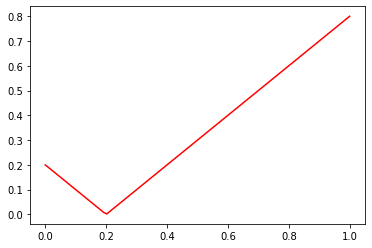

In [9]:
x = np.linspace(0,1,100)
y = f2(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.show()

In [10]:
# Golden Section
result = optimize.minimize_scalar(f2, [0, 1],method="golden", tol=0.001) 
result

     fun: 1.3221403834806633e-05
    nfev: 24
     nit: 19
 success: True
       x: 0.1999867785961652

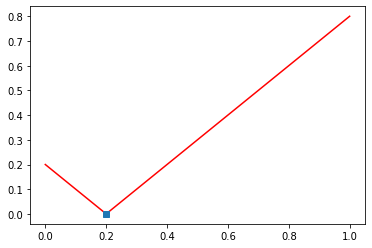

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.plot(result.x, result.fun, 's')
plt.show()

In [12]:
# Nelder-Mead
result = optimize.minimize(f2,x0=1,method="Nelder-Mead", tol=0.001) 
result

 final_simplex: (array([[0.2       ],
       [0.20078125]]), array([7.21644966e-16, 7.81250000e-04]))
           fun: 7.216449660063518e-16
       message: 'Optimization terminated successfully.'
          nfev: 26
           nit: 13
        status: 0
       success: True
             x: array([0.2])

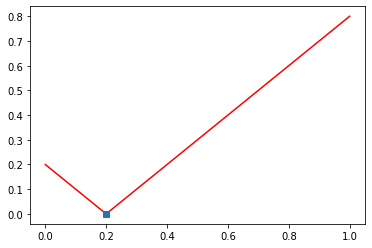

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.plot(result.x, result.fun, 's')
plt.show()

**Function 3**: x*sin(1/x), x E [0.01, 1]

In [14]:
def f3(x):
  return x*np.sin(1/x)

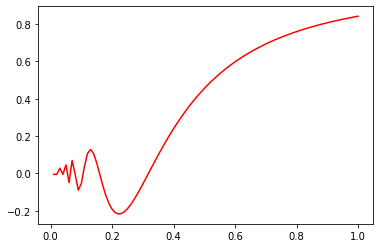

In [15]:
x = np.linspace(0.01,1,100)
y = f3(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.show()

In [16]:
# Golden Section
result = optimize.minimize_scalar(f3, [0.2, 1],method="golden", tol=0.001) 
result

     fun: -0.21723356977335542
    nfev: 23
     nit: 18
 success: True
       x: 0.22258449083232817

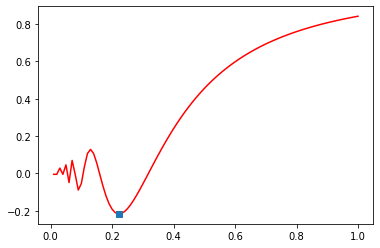

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.plot(result.x, result.fun, 's')
plt.show()

In [18]:
# Nelder-Mead
result = optimize.minimize(fun=f3, x0=1,method="Nelder-Mead", tol=0.001) 
result

 final_simplex: (array([[0.22265625],
       [0.221875  ]]), array([-0.21723311, -0.21721348]))
           fun: -0.21723311119612687
       message: 'Optimization terminated successfully.'
          nfev: 26
           nit: 13
        status: 0
       success: True
             x: array([0.22265625])

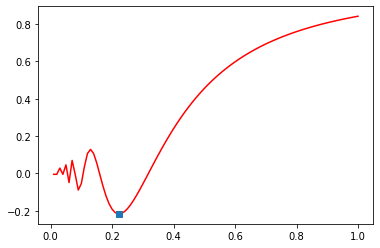

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x,y, 'r')
plt.plot(result.x, result.fun, 's')
plt.show()

# **Approximation**

In [20]:
def linear_fun(x, alpha, beta):
  return alpha*x+beta

In [21]:
def rational_fun(x, alpha, beta):
  return alpha/(1+beta*x)

In [22]:
alpha = np.random.rand()
beta = np.random.rand()
noise = np.random.normal(0,1,101)
print(alpha, beta)

0.27628109174699855 0.987268648107834


In [23]:
k = [*range(0, 101, 1)]
x = np.array([x/100 for x in k])
y = alpha*x + beta + noise

In [24]:
def objective(params):
  alpha, beta = params
  return np.sum(((alpha*x+beta)-y)**2)

**Nelder-Mead**

In [25]:
initial = [0,0]
result = optimize.minimize(fun=objective, x0=initial,method="Nelder-Mead", tol=0.001) 
result

 final_simplex: (array([[-0.30795287,  1.28766987],
       [-0.30820281,  1.28760835],
       [-0.30891873,  1.2884324 ]]), array([108.1042191 , 108.10422282, 108.10422391]))
           fun: 108.10421909522823
       message: 'Optimization terminated successfully.'
          nfev: 113
           nit: 58
        status: 0
       success: True
             x: array([-0.30795287,  1.28766987])

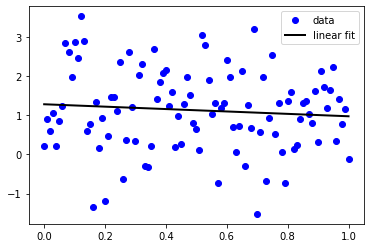

In [26]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='linear fit')
ax.legend()

In [27]:
def objective2(params):
  alpha, beta = params
  return np.sum(((alpha/(1+beta*x))-y)**2)

In [28]:
initial = [0,0]
result = optimize.minimize(fun=objective2, x0=initial,method="Nelder-Mead", tol=0.001) 
result

 final_simplex: (array([[1.2997688 , 0.30697796],
       [1.30002771, 0.30775305],
       [1.30072565, 0.30791127]]), array([108.11158082, 108.11158588, 108.11158925]))
           fun: 108.1115808203243
       message: 'Optimization terminated successfully.'
          nfev: 113
           nit: 59
        status: 0
       success: True
             x: array([1.2997688 , 0.30697796])

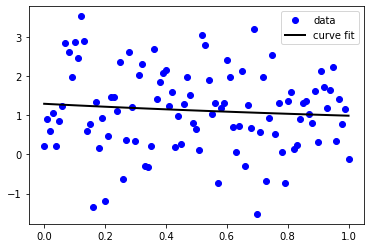

In [29]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='curve fit')
ax.legend()

**Gauss Method**

In [30]:
def GaussMethod(fun, initial, tol):
  y_orig = np.inf
  a_init, b_init = initial
  fev = 0
  iteration = 0

  for i in range(50):
    iteration = iteration + 1
    for a in np.linspace(a_init, 1, 100):
      b = b_init
      y = fun([a, b])
      fev =fev + 1
      if np.abs(y-y_orig) < tol:
        y_orig = y
        a_init = a
        break
      if y < y_orig:
        y_orig = y
        a_init = a

    for b in np.linspace(b_init, 1, 100):
      a = a_init
      y = fun([a, b])
      fev =fev + 1
      if np.abs(y-y_orig) < tol:
        b_init = b
        y_orig = y
        break
      if y < y_orig:
        y_orig = y
        b_init = b
        

  return [a_init, b_init, fev, iteration, y_orig]

In [31]:
initial = [0.001,0.001]
result = GaussMethod(objective, initial, 0.001) 
result

[1.0, 0.001, 199, 50, 163.23884803464193]

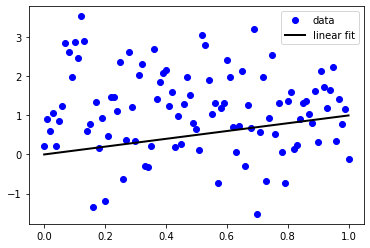

In [32]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result[0], result[1]), '-k', lw=2, label='linear fit')
ax.legend()

In [33]:
initial = [0.3,0.4]
result = GaussMethod(objective2, initial, 0.001) 
result

[1.0, 0.4, 199, 50, 116.75562798924513]

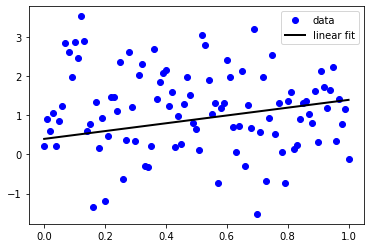

In [34]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result[0], result[1]), '-k', lw=2, label='linear fit')
ax.legend()